In [15]:
import matplotlib.pyplot as plt

import math
%matplotlib inline
import numpy as np
from math import pi
from mpl_toolkits.mplot3d import Axes3D

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.circuit import Parameter


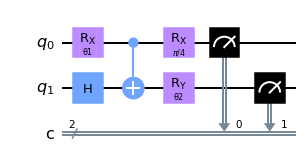

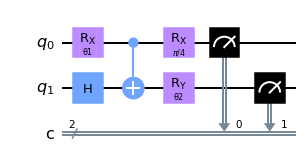

In [16]:
# create a circuit with two parameterized quantum gates

theta1 = Parameter('θ1')
theta2 = Parameter('θ2')
qc = QuantumCircuit(2, 2)

qc.rx(theta1,0)
qc.h(1)
qc.cx(0,1)
qc.rx(pi/4,0)
qc.ry(theta2,1)

qc.measure(range(2), range(2))
qc.draw('mpl')

In [22]:
# assign 17 values to each parameter and store the possibility of measuring state |11> in matrix 'toMatlab'. Contour map is generated with Matlab with respect to this matrix.

x = np.linspace(0, 2 * np.pi, 17)
y = np.linspace(0, 2 * np.pi, 17)
toMatlab = np.zeros((17,17))
for i in range(17):
    for j in range(17):
        circuitToRum = qc.bind_parameters({theta1: x[i],theta2: y[j]})
        job = execute(circuitToRum,
              backend=BasicAer.get_backend('qasm_simulator'),
              shots = 512)
        toMatlab[i][j] = job.result().get_counts().get('11',0)/512

print(toMatlab)

[[ 38.  54.  70.  75.  76.  82.  62.  35.  27.  22.  14.   0.   0.   2.
    5.  26.  50.]
 [ 77.  89. 131. 152. 165. 170. 134. 106.  72.  53.  19.   8.   0.   4.
   22.  50.  82.]
 [132. 183. 234. 241. 262. 246. 211. 140. 121.  79.  31.   9.   0.  14.
   29.  77. 126.]
 [183. 243. 314. 335. 335. 319. 280. 256. 168.  97.  56.  14.   0.  16.
   66. 109. 164.]
 [216. 288. 354. 421. 433. 424. 388. 308. 224. 135.  65.  10.   0.  13.
   67. 138. 219.]
 [242. 333. 420. 476. 487. 476. 412. 334. 259. 152.  79.  23.   0.  13.
   74. 171. 273.]
 [251. 374. 437. 487. 512. 494. 443. 341. 255. 147.  81.  20.   0.  18.
   72. 176. 255.]
 [246. 349. 424. 466. 498. 470. 432. 334. 230. 135.  86.  16.   0.  18.
   76. 145. 245.]
 [199. 301. 370. 415. 437. 413. 358. 304. 233. 125.  57.  15.   0.  21.
   71. 142. 228.]
 [182. 239. 313. 356. 360. 320. 316. 251. 169. 112.  42.  11.   0.  14.
   47. 101. 179.]
 [127. 172. 235. 230. 264. 258. 239. 168. 142.  74.  33.  10.   0.  11.
   40.  77. 142.]
 [ 76. 122